# GMM 기반 이상치 탐지 

In [2]:
# 데이터 가져오기
from google.colab import drive
drive.mount('/content/gdrive/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# One_Class Support Vector Machine , AutoEncoder, Isololation Forest 

path = "/content/gdrive/Shareddrives/DACON_fds/source/fds/"
# 샘플 결과 저장 
submission_path = "/content/gdrive/Shareddrives/DACON_fds/source/submission/"

train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path +"test.csv")
val = pd.read_csv(path +"val.csv")
sample = pd.read_csv(path +"sample_submission.csv")


Mounted at /content/gdrive/


Number of NA is 0
True


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.04      0.80      0.07        30

    accuracy                           0.98     28462
   macro avg       0.52      0.89      0.53     28462
weighted avg       1.00      0.98      0.99     28462



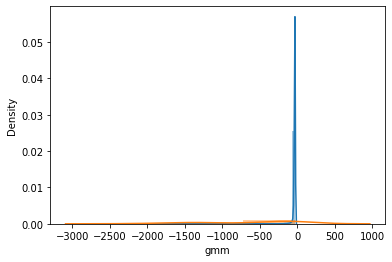

In [ ]:
print("Number of NA is {0}".format(train.isnull().sum().sum()))
print(train['ID'].nunique() == len(train))

train.drop(columns = {"ID"},inplace=True)
val.drop(columns = {"ID"},inplace=True)

X = val[val.columns[:-1]]

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture()
gmm.fit(train)

train['gmm'] = gmm.score_samples(train)

val['gmm'] = gmm.score_samples(X)

thresh = train['gmm'].mean() + 1.5*(train['gmm'].quantile(.75) - train['gmm'].quantile(.25))

val['Predict'] = val['gmm'].apply(lambda x : 1 if x<=-80 else 0)

sns.distplot(val[val['Class']==0]['gmm'])
sns.distplot(val[val['Class']==1]['gmm'])

from sklearn.metrics import classification_report
print(classification_report(val['Class'],val['Predict']))

test.drop(columns = {"ID"},inplace=True)


test['gmm'] = gmm.score_samples(test)
test['Class'] = test['gmm'].apply(lambda x : 1 if x<=thresh else 0)


sample['Class'] = test['Class']
sample.to_csv(submission_path +"sample_submission_1.csv",index=False)

Number of NA is 0
True


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.94      0.97     28432
           1       0.02      0.87      0.03        30

    accuracy                           0.94     28462
   macro avg       0.51      0.90      0.50     28462
weighted avg       1.00      0.94      0.97     28462



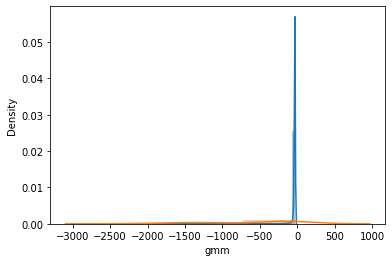

In [ ]:
# One_Class Support Vector Machine , AutoEncoder, Isololation Forest 
# train = pd.read_csv("open/train.csv")
# val = pd.read_csv("open/val.csv")
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path +"test.csv")
val = pd.read_csv(path +"val.csv")
sample = pd.read_csv(path +"sample_submission.csv")

print("Number of NA is {0}".format(train.isnull().sum().sum()))
print(train['ID'].nunique() == len(train))

train.drop(columns = {"ID"},inplace=True)
val.drop(columns = {"ID"},inplace=True)
col = train.columns

std_scaler = StandardScaler()
std_scaler.fit(train)

train = std_scaler.transform(train)
X = val[val.columns[:-1]]
X = std_scaler.transform(X)

train = pd.DataFrame(train, columns=col)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture()
gmm.fit(train)

train['gmm'] = gmm.score_samples(train)

val['gmm'] = gmm.score_samples(X)

thresh = train['gmm'].mean() - 1.5*(train['gmm'].quantile(.75) - train['gmm'].quantile(.25))

val['Predict'] = val['gmm'].apply(lambda x : 1 if x<=thresh else 0)

sns.distplot(val[val['Class']==0]['gmm'])
sns.distplot(val[val['Class']==1]['gmm'])

from sklearn.metrics import classification_report
print(classification_report(val['Class'],val['Predict']))

# test = pd.read_csv("open/test.csv")

test.drop(columns = {"ID"},inplace=True)


test['gmm'] = gmm.score_samples(test)
test['Class'] = test['gmm'].apply(lambda x : 1 if x<=thresh else 0)

# sample = pd.read_csv("open/sample_submission.csv")
sample['Class'] = test['Class']
sample.to_csv(submission_path +"sample_submission_2.csv",index=False)

Number of NA is 0
True


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28432
           1       0.08      0.63      0.14        30

    accuracy                           0.99     28462
   macro avg       0.54      0.81      0.57     28462
weighted avg       1.00      0.99      1.00     28462



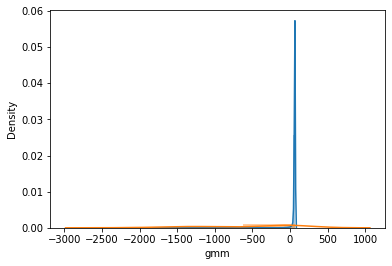

In [ ]:
# One_Class Support Vector Machine , AutoEncoder, Isololation Forest 
# train = pd.read_csv("open/train.csv")
# val = pd.read_csv("open/val.csv")
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path +"test.csv")
val = pd.read_csv(path +"val.csv")
sample = pd.read_csv(path +"sample_submission.csv")

print("Number of NA is {0}".format(train.isnull().sum().sum()))
print(train['ID'].nunique() == len(train))

train.drop(columns = {"ID"},inplace=True)
val.drop(columns = {"ID"},inplace=True)

mm_scaler = MinMaxScaler()
mm_scaler.fit(train)


train = mm_scaler.transform(train)
X = val[val.columns[:-1]]
X = mm_scaler.transform(X)

train = pd.DataFrame(train, columns=col)

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture()
gmm.fit(train)

train['gmm'] = gmm.score_samples(train)

val['gmm'] = gmm.score_samples(X)

thresh = train['gmm'].mean()- 1.5*(train['gmm'].quantile(.75) - train['gmm'].quantile(.25))

val['Predict'] = val['gmm'].apply(lambda x : 1 if x<=-thresh else 0)

sns.distplot(val[val['Class']==0]['gmm'])
sns.distplot(val[val['Class']==1]['gmm'])

from sklearn.metrics import classification_report
print(classification_report(val['Class'],val['Predict']))

# test = pd.read_csv("open/test.csv")

test.drop(columns = {"ID"},inplace=True)


test['gmm'] = gmm.score_samples(test)
test['Class'] = test['gmm'].apply(lambda x : 1 if x<=thresh else 0)

# sample = pd.read_csv("open/sample_submission.csv")
sample['Class'] = test['Class']

sample.to_csv(submission_path +"sample_submission_3.csv",index=False)

# PCA + GMM 기반 이상치 탐지 

In [ ]:
from sklearn.decomposition import PCA

train = pd.read_csv("open/train.csv")
val = pd.read_csv("open/val.csv")

train.drop(columns = {"ID"},inplace=True)
val.drop(columns = {"ID"},inplace=True)

pca = PCA(n_components = 3)
pca.fit(train)
train_X = pca.transform(train)
X = pca.transform(val[val.columns[:-1]])

gmm = GaussianMixture()
gmm.fit(train_X)

train['gmm'] = gmm.score_samples(train_X)
val['gmm'] = gmm.score_samples(X)

thresh = train['gmm'].mean() + 1.5*(train['gmm'].quantile(.75) - train['gmm'].quantile(.25))

val['Predict'] = val['gmm'].apply(lambda x : 1 if x<=thresh else 0)

from sklearn.metrics import classification_report
print(classification_report(val['Class'],val['Predict']))

test = pd.read_csv("open/test.csv")

test.drop(columns = {"ID"},inplace=True)



              precision    recall  f1-score   support

           0       1.00      0.55      0.71     28432
           1       0.00      0.97      0.00        30

    accuracy                           0.55     28462
   macro avg       0.50      0.76      0.36     28462
weighted avg       1.00      0.55      0.71     28462



# One Class Support Vector Machine Anomaly detection

In [ ]:
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM

train = pd.read_csv("open/train.csv")
val = pd.read_csv("open/val.csv")

train.drop(columns = {"ID"},inplace=True)
val.drop(columns = {"ID"},inplace=True)


ocsvm=OneClassSVM(gamma=0.00001, kernel='rbf', max_iter=1000, nu=0.009, verbose=True)
ocsvm.fit(train)

predict = ocsvm.predict(val[val.columns[:-1]])
result = pd.DataFrame()

result['class'] = val['Class']
result['Predict'] = predict
result['Predict'] = result['Predict'].apply(lambda x : 0 if x==1 else 1)

print(classification_report(result['Predict'],result['class']))

[LibSVM]WARN: libsvm Solver reached max_iter
optimization finished, #iter = 1000
obj = 513712.640775, rho = 1009.420140
nSV = 1025, nBSV = 1024


/Users/hyunwoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     28218
           1       0.63      0.08      0.14       244

    accuracy                           0.99     28462
   macro avg       0.81      0.54      0.57     28462
weighted avg       0.99      0.99      0.99     28462



# AutoEncoder활용 이상탐지 

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics.pairwise import cosine_similarity

train = pd.read_csv("open/train.csv")
val = pd.read_csv("open/val.csv")

train.drop(columns = {"ID"},inplace=True)
val.drop(columns = {"ID"},inplace=True)

test = val[val.columns[:-1]]

nFeature=train.shape[1]
inputX = Input(batch_shape=(None,nFeature))

Xencode = Dense(12, activation='relu')(inputX)
Xdecode = Dense(nFeature, activation='linear')(Xencode)

model = Model(inputX, Xdecode)
model.compile(loss='mse', optimizer=Adam(lr=0.001))

h = model.fit(train,train,epochs=300, batch_size=1000, shuffle=True)
yhat=model.predict(test)

dist_list=[]
for i in range(len(yhat)):
    dist = cosine_similarity([test.iloc[0].values],[yhat[0]])
    dist_list.append(dist)

dist_list2 = dist_list.copy()
maxN=492
max_dict={}

for i in range(maxN):
    max_index = dist_list2.index(max(dist_list2))
    max_value = dist_list2.pop(max_index)
    dist_list2.insert(max_index,0)
    max_dict[max_index]=max_value

actual =set(val[val['Class']==1].index)
predicted = set(max_dict.keys())

Train on 113842 samples
Epoch 1/300
113842/113842 [==============================] - 0s 3us/sample - loss: 1.5144
Epoch 2/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.9891
Epoch 3/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.7650
Epoch 4/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.6459
Epoch 5/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.5682
Epoch 6/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.5181
Epoch 7/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.4829
Epoch 8/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.4534
Epoch 9/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.4260
Epoch 10/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.4017
Epoch 11/300
113842/113842 [==============================] - 0s 2us/sample

113842/113842 [==============================] - 0s 2us/sample - loss: 0.3039
Epoch 180/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.3039
Epoch 181/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.3040
Epoch 182/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.3040
Epoch 183/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.3040
Epoch 184/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.3040
Epoch 185/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.3040
Epoch 186/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.3040
Epoch 187/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.3041
Epoch 188/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.3041
Epoch 189/300
113842/113842 [==============================] - 0s 2us/sample - loss: 0.3041
Ep

In [ ]:
print('실제로 비정상인 데이터 수:',len(actual))
print('실제 비정상인데 비정상으로 예측한 데이터 수:',len(actual.intersection(predicted)))
print('precision={}'.format(len(actual.intersection(predicted))/len(actual)))


실제로 비정상인 데이터 수: 30
실제 비정상인데 비정상으로 예측한 데이터 수: 1
precision=0.03333333333333333


# LOF 기반 이상치탐지

In [ ]:
train = pd.read_csv("open/train.csv")
val = pd.read_csv("open/val.csv")

train.drop(columns = {"ID"},inplace=True)
val.drop(columns = {"ID"},inplace=True)


In [ ]:
ratio = len(val[val['Class']==1])/len(val)
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(contamination= ratio,novelty = True)

# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).

clf.fit(train)
y_pred = clf.predict(val[val.columns[:-1]])

/Users/hyunwoo/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
val['pred'] = y_pred
val['pred'] = val['pred'].apply(lambda x : 0 if x==1 else 1)
print(classification_report(val['Class'],val['pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.00      0.00      0.00        30

    accuracy                           1.00     28462
   macro avg       0.50      0.50      0.50     28462
weighted avg       1.00      1.00      1.00     28462



In [ ]:
val['pred'] = y_pred
val['pred'].value_counts()

 1    28435
-1       27
Name: pred, dtype: int64

In [ ]:
val[val['Class']== 1]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,Class,pred
71,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,7.084469,-0.989438,1,0
641,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,-4.959493,...,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,-0.293440,-0.906272,1,0
677,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,-2.351190,-3.944238,...,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,-0.293440,-0.899012,1,0
836,-1.426623,4.141986,-9.804103,6.666273,-4.749527,-2.073129,-10.089931,2.791345,-3.249516,-11.420451,...,0.605809,-0.769348,-1.746337,0.502040,1.977258,0.711607,-0.293440,-0.864214,1,0
1196,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,-13.002709,...,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,-0.293440,-0.749081,1,0
1201,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,-6.264903,-12.916636,...,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,-0.293440,-0.747730,1,0
1547,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,-9.040396,...,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,1.089779,-0.683384,1,0
3055,-3.896583,4.518355,-4.454027,5.547453,-4.121459,-1.163407,-6.805053,2.928356,-4.917130,-6.600461,...,-0.151104,0.011007,0.080303,0.412191,0.635789,0.501050,-0.243695,-0.572916,1,0
4039,1.159373,2.844795,-4.050680,4.777701,2.948980,-2.010361,1.744086,-0.410287,-2.450198,-2.042168,...,-0.529323,-0.597020,1.335954,0.547092,0.009979,0.160769,-0.293440,-0.521811,1,0
4267,-13.897206,6.344280,-14.281666,5.581009,-12.887133,-3.146176,-15.450467,9.060281,-5.486121,-14.676470,...,-0.232710,0.763508,0.075456,-0.453840,-1.508968,-0.686836,-0.167819,-0.509628,1,0


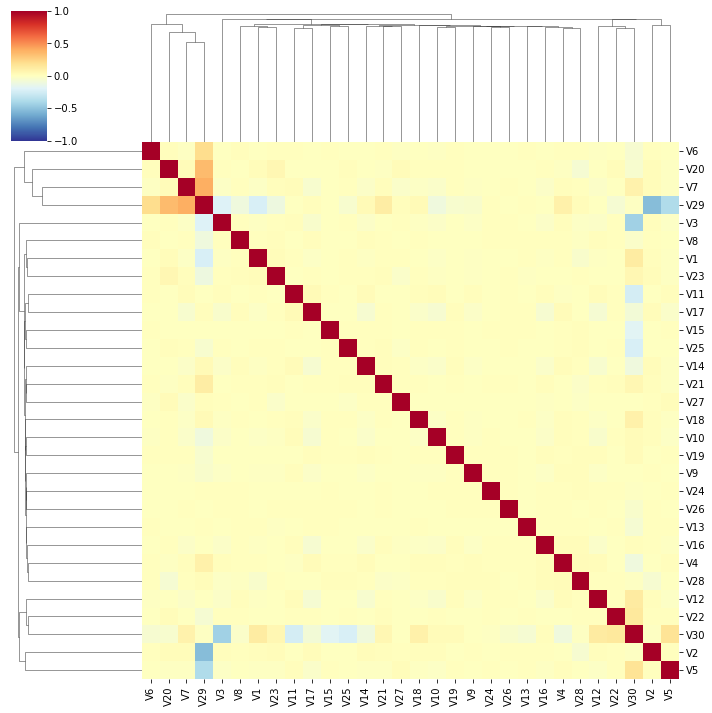

In [ ]:
df = train.corr()
sns.clustermap(df,cmap = 'RdYlBu_r',vmin = -1, vmax = 1)

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
V1,1.000000,0.015507,-0.015559,0.005334,-0.009902,-0.000177,-0.021839,0.003626,-0.009599,-0.019278,...,0.000829,-0.001097,0.017551,-0.001289,0.002329,-0.002013,0.004085,-0.044459,-0.231744,0.118519
V2,0.015507,1.000000,0.015350,-0.004632,0.005220,0.004119,0.020025,0.002628,0.001865,0.011013,...,0.010194,0.003269,0.015923,-0.004967,-0.003145,0.000796,0.005265,-0.056137,-0.530737,-0.008336
V3,-0.015559,0.015350,1.000000,0.014562,-0.021869,-0.000392,-0.023424,0.002836,-0.017386,-0.028125,...,-0.001319,0.004616,0.001575,0.003254,0.000031,0.000671,0.003680,-0.022925,-0.207185,-0.429787
V4,0.005334,-0.004632,0.014562,1.000000,0.009886,0.001191,0.011269,0.000271,0.008993,0.015209,...,-0.000008,-0.002732,-0.004866,0.001741,0.001838,0.002832,-0.007131,0.025828,0.091913,-0.103017
V5,-0.009902,0.005220,-0.021869,0.009886,1.000000,-0.000701,-0.012571,-0.000730,-0.006367,-0.015695,...,-0.013559,0.004033,-0.009856,0.004302,-0.001611,-0.000664,0.020649,-0.004484,-0.382747,0.175038
V6,-0.000177,0.004119,-0.000392,0.001191,-0.000701,1.000000,-0.010017,0.008153,-0.004149,-0.008792,...,0.006419,-0.004982,0.004990,-0.001185,-0.000470,-0.003615,-0.011486,0.000046,0.210381,-0.061977
V7,-0.021839,0.020025,-0.023424,0.011269,-0.012571,-0.010017,1.000000,0.000813,-0.009075,-0.033170,...,0.008721,-0.000123,0.011034,-0.001084,0.000420,0.004651,-0.033952,0.006749,0.391239,0.084646
V8,0.003626,0.002628,0.002836,0.000271,-0.000730,0.008153,0.000813,1.000000,-0.003052,-0.001326,...,0.001672,0.000508,0.013885,0.000094,-0.003231,0.003217,-0.006134,-0.014922,-0.102777,-0.036350
V9,-0.009599,0.001865,-0.017386,0.008993,-0.006367,-0.004149,-0.009075,-0.003052,1.000000,-0.009130,...,-0.007212,-0.002725,-0.008715,0.002114,-0.001449,0.001348,-0.001733,0.008454,-0.041503,-0.007580
V10,-0.019278,0.011013,-0.028125,0.015209,-0.015695,-0.008792,-0.033170,-0.001326,-0.009130,1.000000,...,-0.006280,0.001598,-0.015512,0.004706,-0.000694,-0.000581,-0.005133,0.002669,-0.103121,0.029717
